In [1]:
!pip install shap

     |████████████████████████████████| 436 kB 4.3 MB/s eta 0:00:01


In [5]:
!pip install sklearn_pandas

In [40]:
#importing the libraries 
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# data=pd.read_csv("/content/drive/MyDrive/House_Rent_Dataset.csv")
# datac=pd.read_csv("/content/drive/MyDrive/House_Rent_Dataset.csv")
data = pd.read_csv("./telecom_churn.csv")
datac = pd.read_csv("./telecom_churn.csv")

In [42]:
data.name = "data"
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [43]:
#Data types of the columns present in the DataSet
data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [44]:
data.count()

State                     3333
Account length            3333
Area code                 3333
International plan        3333
Voice mail plan           3333
Number vmail messages     3333
Total day minutes         3333
Total day calls           3333
Total day charge          3333
Total eve minutes         3333
Total eve calls           3333
Total eve charge          3333
Total night minutes       3333
Total night calls         3333
Total night charge        3333
Total intl minutes        3333
Total intl calls          3333
Total intl charge         3333
Customer service calls    3333
Churn                     3333
dtype: int64

In [45]:
# To check duplicated values 
print(data.duplicated().value_counts()) 

False    3333
dtype: int64


In [46]:
#changing our Main prediction (dependent) variable "Churn" from Bool to Int type for detailed Statistical results
data['Churn'] = data['Churn'].astype('int64')

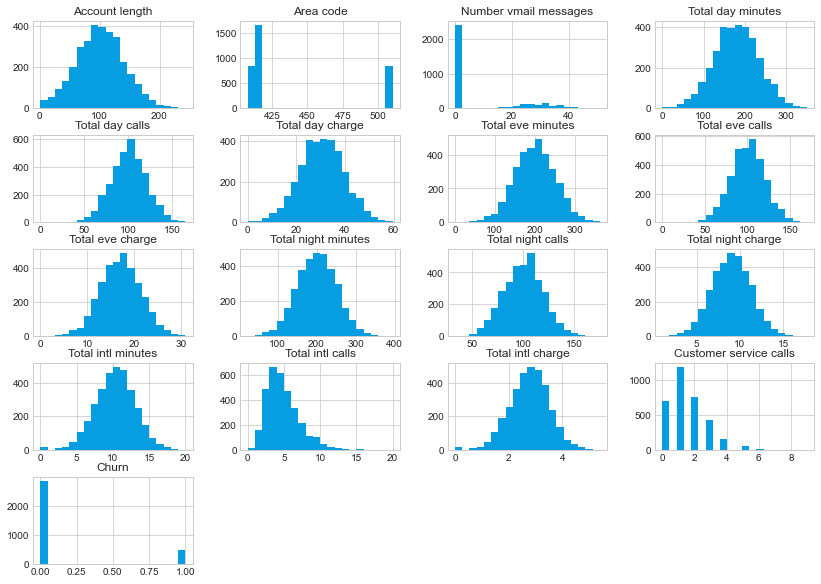

In [47]:
plt.style.use('seaborn-whitegrid')

data.hist(bins=20, figsize=(14,10), color='#069EE1')
plt.show();

<AxesSubplot:>

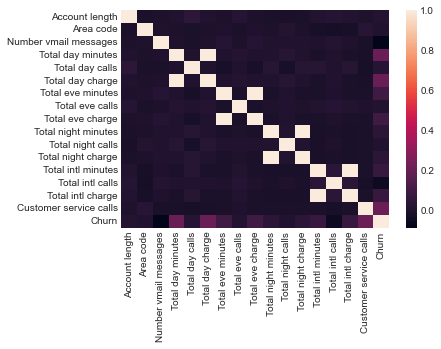

In [48]:
sns.heatmap(data.corr())

<AxesSubplot:xlabel='Total day minutes', ylabel='Churn'>

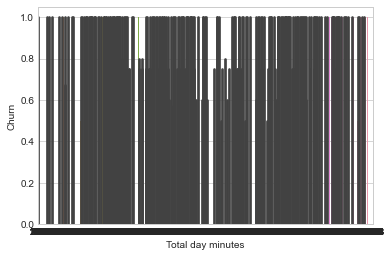

In [49]:
sns.barplot(x = data['Total day minutes'], y = data['Churn'], data = data)

In [50]:
# We need to check missing values in dataset
data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [53]:
drop_list = [
    'State',
    'Account length',
    'Area code',
    'International plan',
    'Voice mail plan',
    'Total day charge',
    'Total eve charge',
    'Total intl minutes',
    'Total night minutes',
    'Number vmail messages',
    'Total night charge',
    'Total eve minutes',
    'Total intl charge',
    'Total day calls',
    'Total eve calls',
    'Total night calls',
    'Total intl calls'
]
data.drop(drop_list,axis=1,inplace=True)
datac.drop(drop_list,axis=1,inplace=True)

In [54]:
#Normalizing all the values present in the dataset.(Categorical values as well.)

data = pd.get_dummies(data)


from sklearn import preprocessing
import pandas as pd

#d = preprocessing.normalize(data)
#scaled_data = pd.DataFrame(d, columns=data.columns)
#scaled_data.head()

In [55]:
# Normalizing the data in the columns beacuse some values are too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats

x = data[['Total day minutes','Customer service calls','Churn']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[['Total day minutes','Customer service calls','Churn']] = pd.DataFrame(x_scaled)

In [56]:
data.head()

,Total day minutes,Customer service calls,Churn
0,0.755701,0.111111,0.0
1,0.460661,0.111111,0.0
2,0.693843,0.000000,0.0
3,0.853478,0.222222,0.0
4,0.475200,0.333333,0.0


In [57]:
data2 = data.copy(deep=True)

In [58]:
#Removing target variable from dataset. to create input varaibles and output (or) target variable.
y = data['Churn']
#x = data[['BHK','Size','Floor','Area Type','City','Furnishing Status','Tenant Preferred','Bathroom','Point of Contact']]
#'Area Locality'
drop_list2 = ['Churn']
data2.drop(drop_list2,axis=1,inplace=True)
x = data2.copy(deep=True)

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split( x, y, test_size=0.2, shuffle=False)

In [60]:
from sklearn.preprocessing import LabelEncoder
X_train = X_train.apply(LabelEncoder().fit_transform)
X_test = X_test.apply(LabelEncoder().fit_transform)

In [61]:
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold
#Importing Models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [62]:
#ss=StandardScaler()
#X_train=ss.fit_transform(X_train)
#X_test=ss.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_test)

print('Error', np.sqrt(mean_squared_error(Y_test, y_pred)))

Error 0.366386571818444


In [63]:
print(lin_reg.score(X_test, Y_test))
print(r2_score(Y_test, y_pred))

0.01809365259894491
0.01809365259894491


<AxesSubplot:title={'center':"Model Coeff's"}>

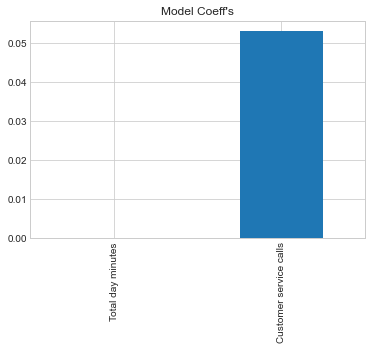

In [64]:
coef = pd.Series(lin_reg.coef_, x.columns).sort_values()
coef.plot(kind='bar', title =  'Model Coeff\'s')

In [65]:
reg = sm.OLS(Y_train, X_train).fit()

In [66]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Churn   R-squared (uncentered):                   0.196
Model:                            OLS   Adj. R-squared (uncentered):              0.196
Method:                 Least Squares   F-statistic:                              325.3
Date:                Wed, 07 Dec 2022   Prob (F-statistic):                   3.80e-127
Time:                        08:15:44   Log-Likelihood:                         -873.46
No. Observations:                2666   AIC:                                      1751.
Df Residuals:                    2664   BIC:                                      1763.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Total day minutes          0.0001   1.05e-05     10.480      0.000    8.97e-05       0.000
Customer service calls     0.0437      0.004     10.063      0.000       0.035       0.052
==============================================================================
Omnibus:                      907.068   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2201.868
Skew:                           1.950   Prob(JB):                         0.00
Kurtosis:                       5.147   Cond. No.                         559.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
import shap
shap.initjs()
model = LinearRegression()
model.fit(X_test, Y_test)

LinearRegression()

In [68]:
explainer = shap.LinearExplainer(model, X_test)
shap_values = explainer.shap_values(X_test)

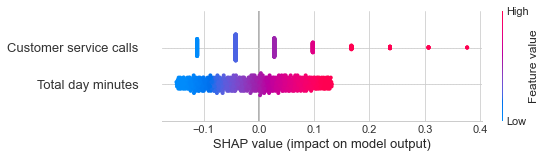

In [69]:
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, X_test)

In [70]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)

In [71]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, shuffle=False)
catagorical_features = []
numerical_features = [c for c in X_train2.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = RandomForestRegressor()

def evaluate(x, y, mapper=None, reg=None, transform=False):
    if transform:
        x = mapper.transform(x)
        x = sm.add_constant(x, has_constant='add') 
    y_pred2 = reg.predict(x)
    return mean_absolute_error(y, y_pred2)

pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train2, y_train2)

train_mae = evaluate(X_train2, y_train2, reg=pipeline)
print(f"train MAE = {round(train_mae, 3)}")

train MAE = 0.073


In [72]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, shuffle=False)
catagorical_features = []
numerical_features = [c for c in X_test2.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = RandomForestRegressor()

def evaluate(x, y, mapper=None, reg=None, transform=False):
    if transform:
        x = mapper.transform(x)
        x = sm.add_constant(x, has_constant='add') 
    y_pred2 = reg.predict(x)
    return mean_absolute_error(y, y_pred2)

pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_test2, y_test2)

test_mae = evaluate(X_test2, y_test2, reg=pipeline)
print(f"test MAE = {round(test_mae, 3)}")

test MAE = 0.067


<BarContainer object of 2 artists>

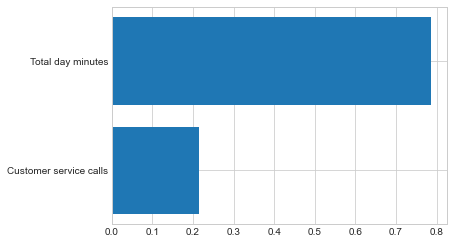

In [73]:
sorted_idx = reg.feature_importances_.argsort()
features = numerical_features + catagorical_features 
result = sorted(zip(features, reg.feature_importances_), key = lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])

In [74]:
datac = pd.get_dummies(datac)

In [75]:
datac2 = datac.copy(deep=True)

In [77]:
#Removing target variable from dataset. to create input varaibles and output (or) target variable.
y2 = datac2['Churn']
#x = data[['BHK','Size','Floor','Area Type','City','Furnishing Status','Tenant Preferred','Bathroom','Point of Contact']]
#'Area Locality'
drop_list3 = ['Churn']
datac2.drop(drop_list2,axis=1,inplace=True)
x2 = datac2.copy(deep=True)

In [78]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, shuffle=False)
my_model = RandomForestClassifier(random_state=0).fit(X_train2, y_train2)

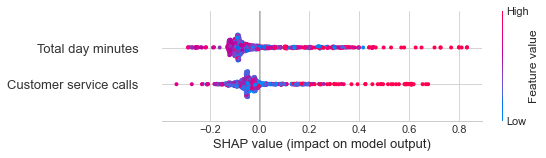

In [79]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test2)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test2)

In [80]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test2)

In [81]:
! pip install h2o
#Installing H20

In [82]:
import h2o
from h2o.automl import H2OAutoML
import os

In [83]:
h2o.init(strict_version_check=False)
#taken from references
#It starts the H2o clusters

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "19" 2022-09-20; OpenJDK Runtime Environment Homebrew (build 19); OpenJDK 64-Bit Server VM Homebrew (build 19, mixed mode, sharing)
  Starting server from /Users/nikhilbindal/opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/10/h7s5r7412qx71dtcn7qt4_ym0000gn/T/tmpi1lqyzos
  JVM stdout: /var/folders/10/h7s5r7412qx71dtcn7qt4_ym0000gn/T/tmpi1lqyzos/h2o_nikhilbindal_started_from_python.out
  JVM stderr: /var/folders/10/h7s5r7412qx71dtcn7qt4_ym0000gn/T/tmpi1lqyzos/h2o_nikhilbindal_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,1 month and 9 days
H2O_cluster_name:,H2O_from_python_nikhilbindal_nqf40w
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [84]:
df = h2o.import_file("./telecom_churn.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [85]:
drop_list_auto = [
    'State',
    'Account length',
    'Area code',
    'International plan',
    'Voice mail plan',
    'Total day charge',
    'Total eve charge',
    'Total intl minutes',
    'Total night minutes',
    'Number vmail messages',
    'Total night charge',
    'Total eve minutes',
    'Total intl charge',
    'Total day calls',
    'Total eve calls',
    'Total night calls',
    'Total intl calls'
]

df.drop(drop_list_auto,axis=1)

Total day minutes,Customer service calls,Churn
265.1,1,False
161.6,1,False
243.4,0,False
299.4,2,False
166.7,3,False
223.4,0,False
218.2,3,False
157,0,False
184.5,1,False
258.6,0,False


In [86]:
df_train,df_test,df_valid = df.split_frame(ratios=[.7, .15])

In [88]:
y3 = "Churn"
x3 = df.columns
x3.remove(y3)

In [89]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = [], verbosity="info", nfolds=0)

In [90]:
aml.train(x = x3, y = y3, training_frame = df_train, validation_frame=df_valid)

AutoML progress: |
08:22:37.908: Project: AutoML_1_20221207_82237
08:22:37.911: Cross-validation disabled by user: no fold column nor nfolds > 1.
08:22:37.911: Setting stopping tolerance adaptively based on the training frame: 0.020721216851891204
08:22:37.912: Build control seed: 10
08:22:37.913: training frame: Frame key: AutoML_1_20221207_82237_training_py_3_sid_957e    cols: 20    rows: 2329  chunks: 16    size: 123601  checksum: -461088802910242348
08:22:37.914: validation frame: Frame key: py_5_sid_957e    cols: 20    rows: 467  chunks: 16    size: 77989  checksum: 5263581877628609210
08:22:37.914: leaderboard frame: Frame key: py_5_sid_957e    cols: 20    rows: 467  chunks: 16    size: 77989  checksum: 5263581877628609210
08:22:37.915: blending frame: NULL
08:22:37.915: response column: Churn
08:22:37.916: fold column: null
08:22:37.916: weights column: null
08:22:37.960: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), l

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20221207_82237


Model Summary: 
    number_of_trees
--  -----------------
    65

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.03052508718780922
RMSE: 0.17471430161211537
LogLoss: 0.12465574057344737
Mean Per-Class Error: 0.08237773050659612
AUC: 0.9770454220442601
AUCPR: 0.9360352373595339
Gini: 0.9540908440885203

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4987911283969879
       False    True    Error    Rate
-----  -------  ------  -------  -------------
False  1983     9       0.0045   (9.0/1992.0)
True   54       283     0.1602   (54.0/337.0)
Total  2037     292     0.0271   (63.0/2329.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.498791     0.899841  152
max f2                       0.34873      0.868657  179
max f0point5                 0.559123     0.940288  142
max accuracy                 0.498791     0.97295   152
max precision                0.995696     1         0
max recall                   0.00272401   1         397
max specificity              0.995696     1         0
max absolute_mcc             0.498791     0.887332  152
max min_per_class_accuracy   0.149515     0.916914  247
max mean_per_class_accuracy  0.196777     0.925163  223
max tns                      0.995696     1992      0
max fns                      0.995696     336       0
max fps                      0.00147926   1992      399
max tps                      0.00272401   337       397
max tnr                      0.995696     1         0
max fnr                      0.995696     0.997033  0
max fpr                      0.00147926   1         399
max tpr                      0.00272401   1         397

Gains/Lift Table: Avg response rate: 14.47 %, avg score: 14.48 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0103049                   0.960989           6.91098    6.91098            1                0.976085    1                           0.976085            0.0712166       0.0712166                  591.098   591.098            0.0712166
2        0.0201803                   0.938861           6.91098    6.91098            1                0.948269    1                           0.962473            0.0682493       0.139466                   591.098   591.098            0.139466
3        0.0300558                   0.916134           6.91098    6.91098            1                0.928978    1                           0.951467            0.0682493       0.207715                   591.098   591.098            0.207715
4        0.0403607                   0.889117           6.91098    6.91098            1                0.900952    1                           0.93857             0.0712166       0.278932                   591.098   591.098            0.278932
5        0.0502362                   0.864577           6.91098    6.91098            1                0.873461    1                           0.925771            0.0682493       0.347181                   591.098   591.098            0.347181
6        0.100043                    0.663936           6.73225    6.822              0.974138         0.780478    0.987124                    0.853436            0.335312        0.682493                   573.225   582.2              0.680987
7        0.150279                    0.291158           3.

In [91]:
lb = aml.leaderboard

In [92]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_1_20221207_82237,0.938983,0.184438,0.859909,0.120319,0.222431,0.0494754
XGBoost_3_AutoML_1_20221207_82237,0.933437,0.15266,0.887435,0.105447,0.190124,0.036147
GBM_3_AutoML_1_20221207_82237,0.927539,0.186746,0.866516,0.136112,0.211432,0.0447034
XGBoost_2_AutoML_1_20221207_82237,0.926397,0.18284,0.855292,0.0946668,0.218295,0.0476526
DRF_1_AutoML_1_20221207_82237,0.92577,0.258476,0.873938,0.1128,0.224662,0.0504729
GBM_2_AutoML_1_20221207_82237,0.925015,0.177127,0.869411,0.128759,0.206784,0.0427596
GBM_4_AutoML_1_20221207_82237,0.912926,0.19299,0.866233,0.11656,0.2097,0.0439743
GBM_1_AutoML_1_20221207_82237,0.910419,0.239495,0.728116,0.168528,0.266457,0.0709992
XRT_1_AutoML_1_20221207_82237,0.90924,0.300609,0.830253,0.125332,0.247843,0.0614263
GLM_1_AutoML_1_20221207_82237,0.845183,0.310883,0.541147,0.236621,0.307628,0.094635


In [93]:
df_pred=aml.leader.predict(df_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [94]:
df_pred.head()

predict,False,True
False,0.989003,0.0109971
False,0.968724,0.0312756
False,0.987872,0.0121279
True,0.20317,0.79683
False,0.931902,0.0680984
False,0.979808,0.0201924
False,0.993757,0.00624295
False,0.928159,0.0718412
False,0.995651,0.00434929
False,0.949087,0.0509129


In [95]:
aml.leader.model_performance(df_test)

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.04891464067974322
RMSE: 0.22116654511870285
LogLoss: 0.20997007004478732
Mean Per-Class Error: 0.12095692978045919
AUC: 0.8840707223060165
AUCPR: 0.8348465228648883
Gini: 0.7681414446120329

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34567543864250183
       False    True    Error    Rate
-----  -------  ------  -------  ------------
False  448      11      0.024    (11.0/459.0)
True   17       61      0.2179   (17.0/78.0)
Total  465      72      0.0521   (28.0/537.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.345675     0.813333  70
max f2                       0.345675     0.794271  70
max f0point5                 0.52929      0.901361  53
max accuracy                 0.52929      0.951583  53
max precision                0.996162     1         0
max recall                   0.0024954    1         390
max specificity              0.996162     1         0
max absolute_mcc             0.52929      0.793542  53
max min_per_class_accuracy   0.0905552    0.846154  132
max mean_per_class_accuracy  0.345675     0.879043  70
max tns                      0.996162     459       0
max fns                      0.996162     77        0
max fps                      0.000809794  459       399
max tps                      0.0024954    78        390
max tnr                      0.996162     1         0
max fnr                      0.996162     0.987179  0
max fpr                      0.000809794  1         399
max tpr                      0.0024954    1         390

Gains/Lift Table: Avg response rate: 14.53 %, avg score: 13.35 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0111732                   0.941732           6.88462   6.88462            1                0.975039    1                           0.975039            0.0769231       0.0769231                  588.462   588.462            0.0769231
2        0.0204842                   0.926889           6.88462   6.88462            1                0.93413     1                           0.956444            0.0641026       0.141026                   588.462   588.462            0.141026
3        0.0316574                   0.907454           6.88462   6.88462            1                0.918292    1                           0.942979            0.0769231       0.217949                   588.462   588.462            0.217949
4        0.0409683                   0.831353           6.88462   6.88462            1                0.870877    1                           0.926592            0.0641026       0.282051                   588.462   588.462            0.282051
5        0.0502793                   0.787883           6.88462   6.88462            1                0.805138    1                           0.9041              0.0641026       0.346154                   588.462   588.462            0.346154
6        0.100559                    0.52708            6.62963   6.75712            0.962963         0.676688    0.981481                    0.790394            0.333333        0.679487                   562.963   575.712            0.677309
7        0.150838                    0.290293           2.03989   5.18471            0.296296         0.399202    0.753086                    0.659997            0.102564        0.782051                   103.989   418.471            0.738478
8  

In [96]:
import shap
shap.initjs()

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo,predict,False,True
DRF_1_AutoML_1_20221207_82237,0.899447,0.214024,0.833293,0.138973,0.232959,0.0542697,2333,0.024041,DRF,False,0.92,0.08
GBM_4_AutoML_1_20221207_82237,0.893148,0.223417,0.821198,0.168845,0.222771,0.049627,1062,0.022733,GBM,False,0.964905,0.0350955
XGBoost_2_AutoML_1_20221207_82237,0.892003,0.197815,0.836418,0.128331,0.213039,0.0453856,1059,0.01819,XGBoost,False,0.984532,0.0154679
XGBoost_3_AutoML_1_20221207_82237,0.885104,0.180954,0.852575,0.112242,0.197907,0.0391672,769,0.016413,XGBoost,False,0.980826,0.0191742
XGBoost_1_AutoML_1_20221207_82237,0.884071,0.20997,0.834847,0.120957,0.221167,0.0489146,2764,0.020797,XGBoost,False,0.989003,0.0109971
GBM_3_AutoML_1_20221207_82237,0.875384,0.231769,0.807208,0.15615,0.226776,0.0514275,1292,0.03331,GBM,False,0.981893,0.0181067
XRT_1_AutoML_1_20221207_82237,0.874099,0.400126,0.831608,0.134741,0.235835,0.0556182,1649,0.037547,DRF,False,0.880769,0.119231
GBM_1_AutoML_1_20221207_82237,0.87301,0.260893,0.738858,0.202237,0.265078,0.0702664,2644,0.021305,GBM,False,0.941478,0.0585221
GBM_2_AutoML_1_20221207_82237,0.871069,0.227827,0.803441,0.166792,0.227378,0.0517006,1904,0.025678,GBM,False,0.98673,0.0132699
GLM_1_AutoML_1_20221207_82237,0.822845,0.327311,0.461377,0.226957,0.315619,0.0996156,1165,0.014434,GLM,False,0.953782,0.0462181


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

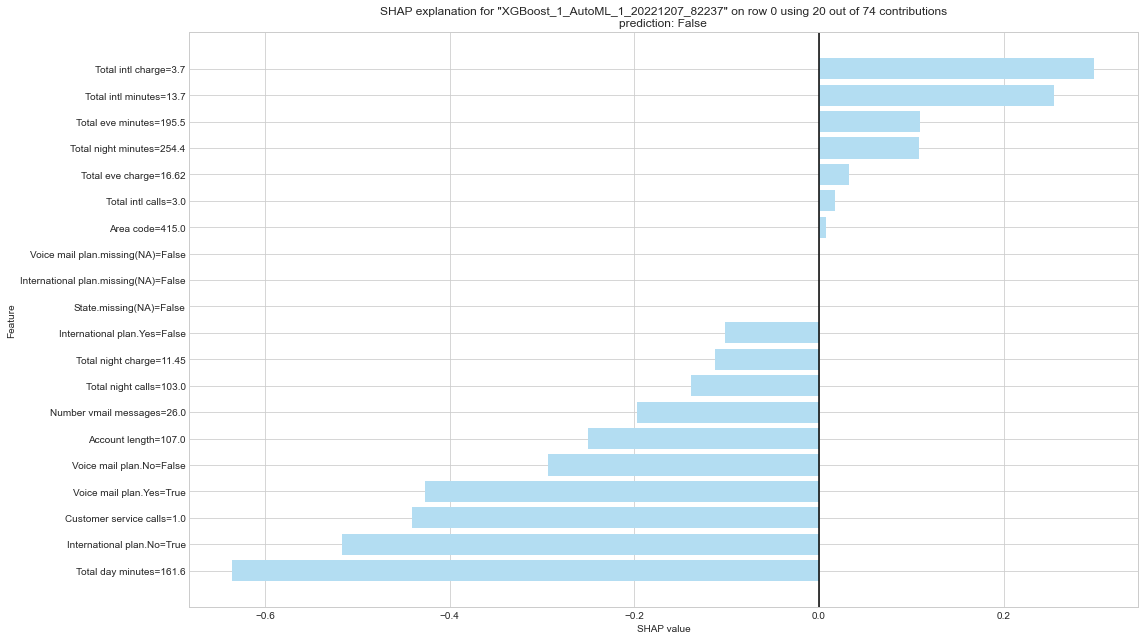

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo,predict,False,True
DRF_1_AutoML_1_20221207_82237,0.899447,0.214024,0.833293,0.138973,0.232959,0.0542697,2333,0.024041,DRF,False,0.92,0.08
GBM_4_AutoML_1_20221207_82237,0.893148,0.223417,0.821198,0.168845,0.222771,0.049627,1062,0.022733,GBM,False,0.964905,0.0350955
XGBoost_2_AutoML_1_20221207_82237,0.892003,0.197815,0.836418,0.128331,0.213039,0.0453856,1059,0.01819,XGBoost,False,0.984532,0.0154679
XGBoost_3_AutoML_1_20221207_82237,0.885104,0.180954,0.852575,0.112242,0.197907,0.0391672,769,0.016413,XGBoost,False,0.980826,0.0191742
XGBoost_1_AutoML_1_20221207_82237,0.884071,0.20997,0.834847,0.120957,0.221167,0.0489146,2764,0.020797,XGBoost,False,0.989003,0.0109971
GBM_3_AutoML_1_20221207_82237,0.875384,0.231769,0.807208,0.15615,0.226776,0.0514275,1292,0.03331,GBM,False,0.981893,0.0181067
XRT_1_AutoML_1_20221207_82237,0.874099,0.400126,0.831608,0.134741,0.235835,0.0556182,1649,0.037547,DRF,False,0.880769,0.119231
GBM_1_AutoML_1_20221207_82237,0.87301,0.260893,0.738858,0.202237,0.265078,0.0702664,2644,0.021305,GBM,False,0.941478,0.0585221
GBM_2_AutoML_1_20221207_82237,0.871069,0.227827,0.803441,0.166792,0.227378,0.0517006,1904,0.025678,GBM,False,0.98673,0.0132699
GLM_1_AutoML_1_20221207_82237,0.822845,0.327311,0.461377,0.226957,0.315619,0.0996156,1165,0.014434,GLM,False,0.953782,0.0462181


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [97]:
aml.explain_row(df_test, row_index=0)

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_1_AutoML_1_20221207_82237

,False,True,Error,Rate
False,448.0,11.0,0.024,(11.0/459.0)
True,17.0,61.0,0.2179,(17.0/78.0)
Total,465.0,72.0,0.0521,(28.0/537.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

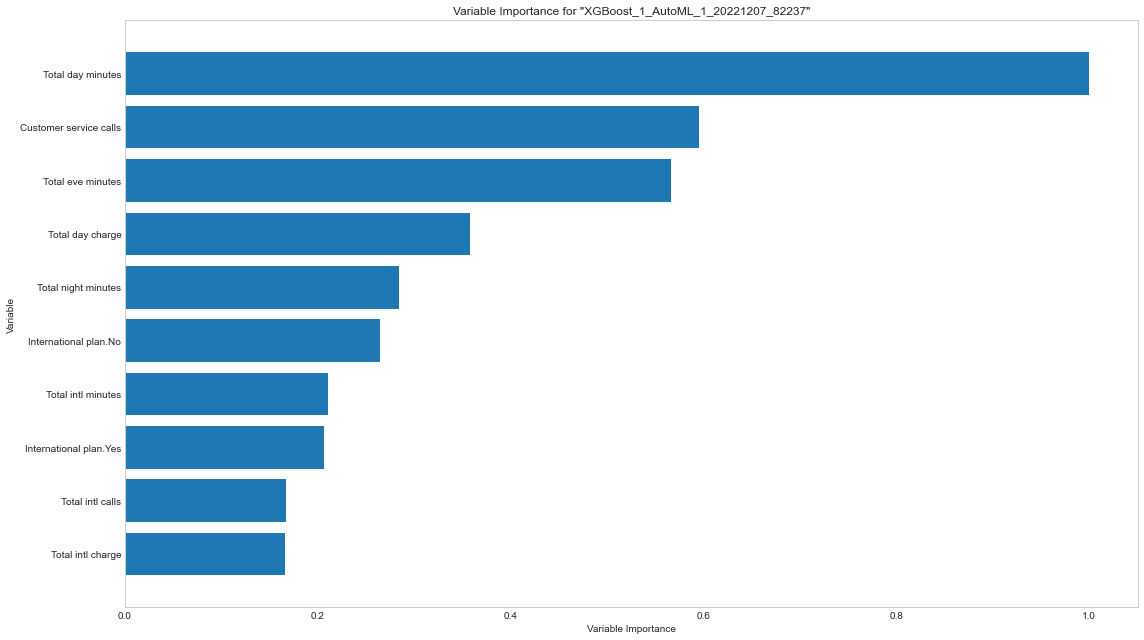

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

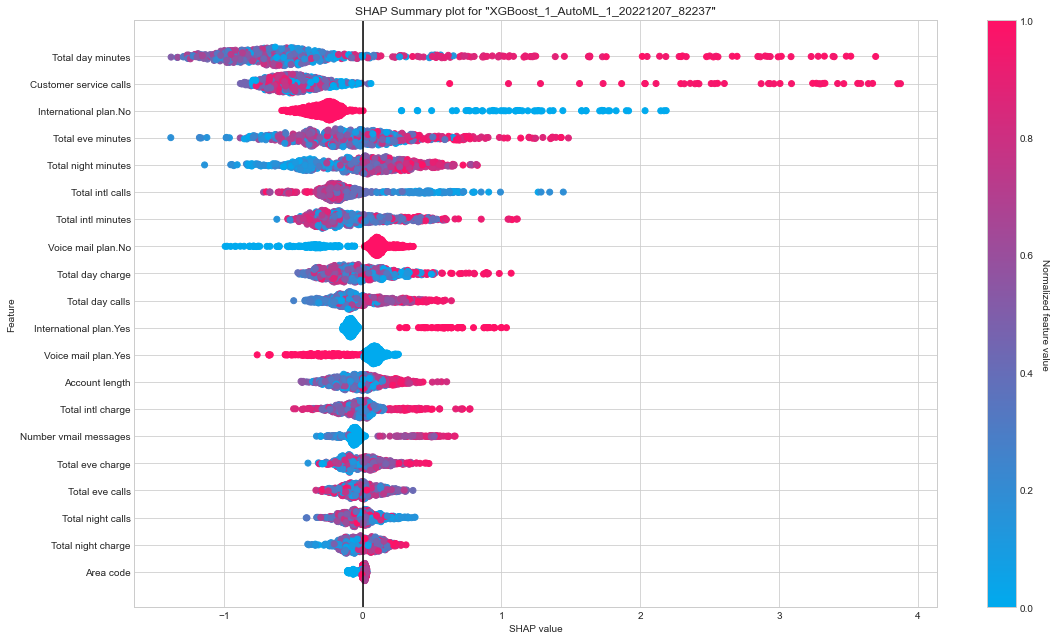

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

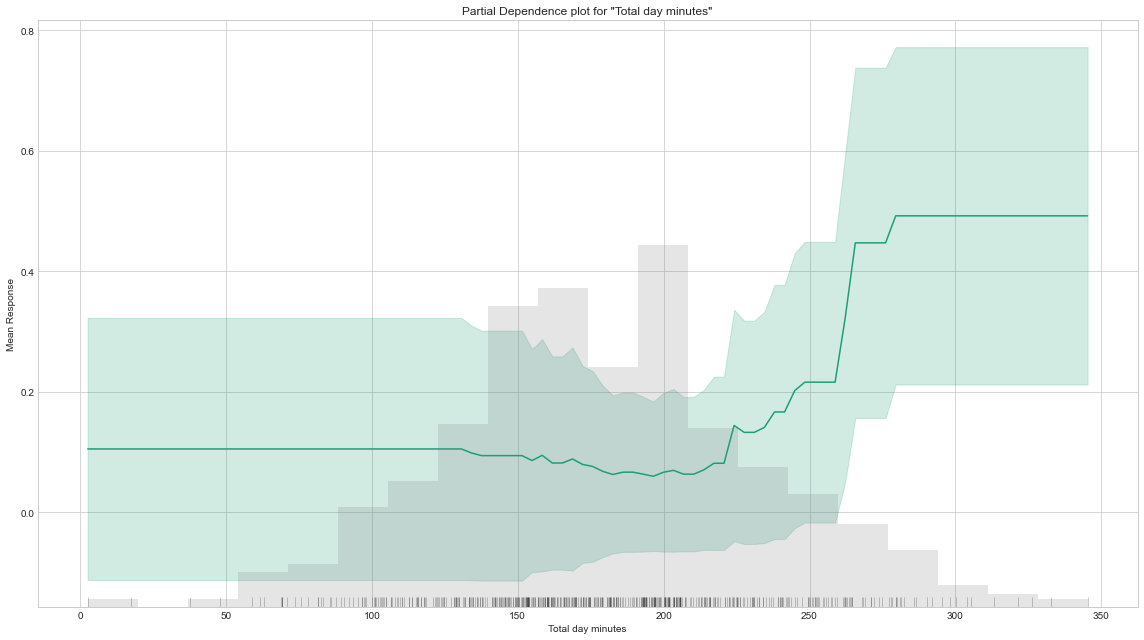

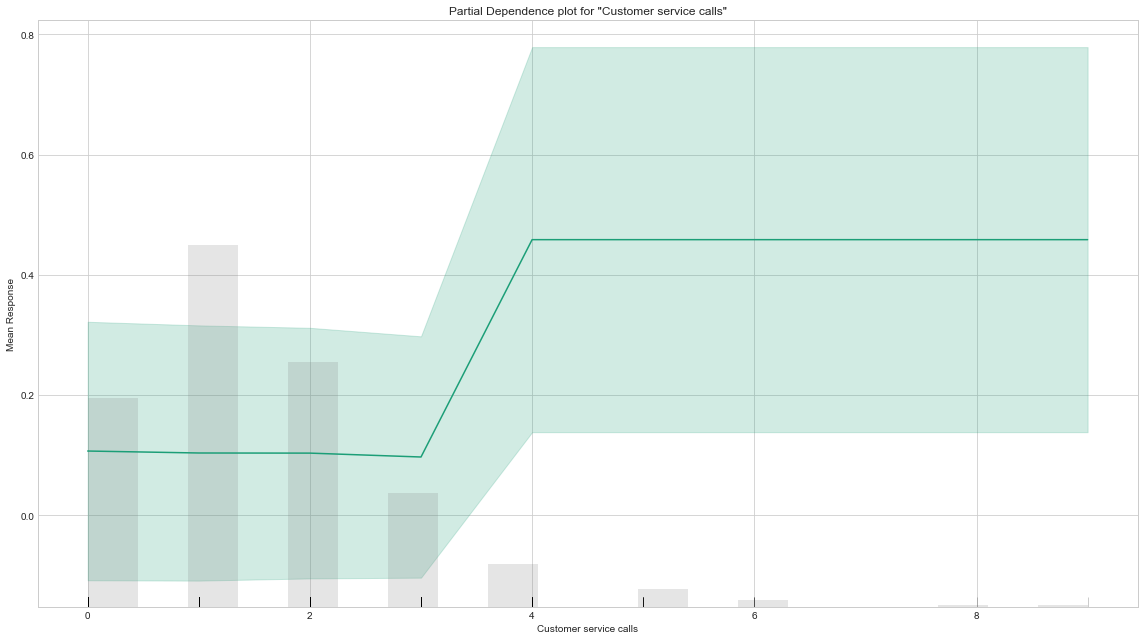

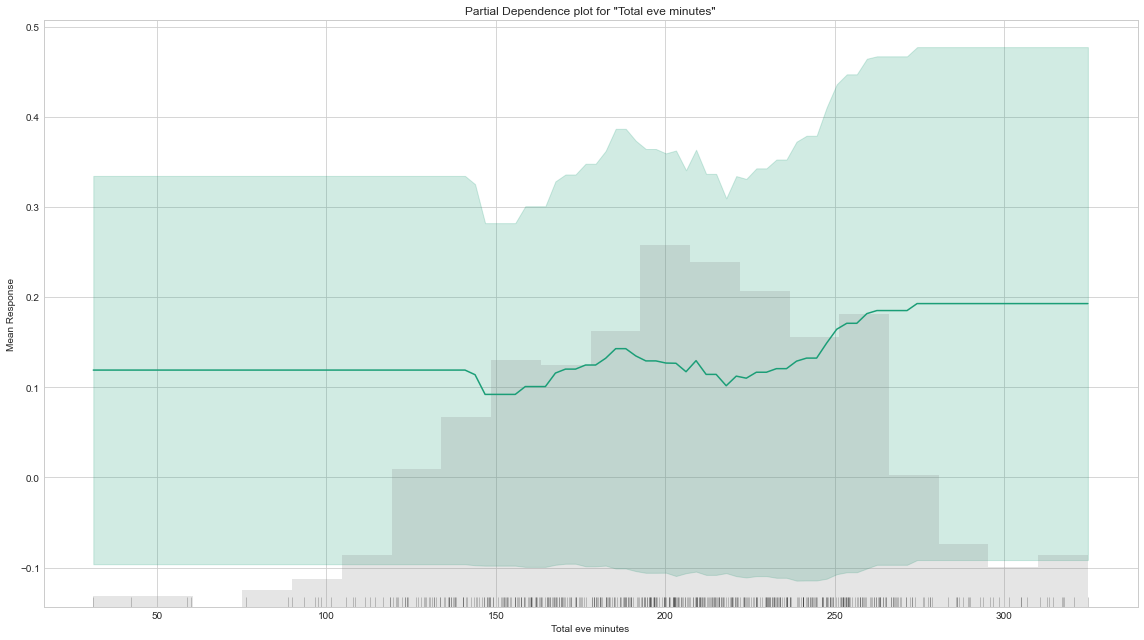

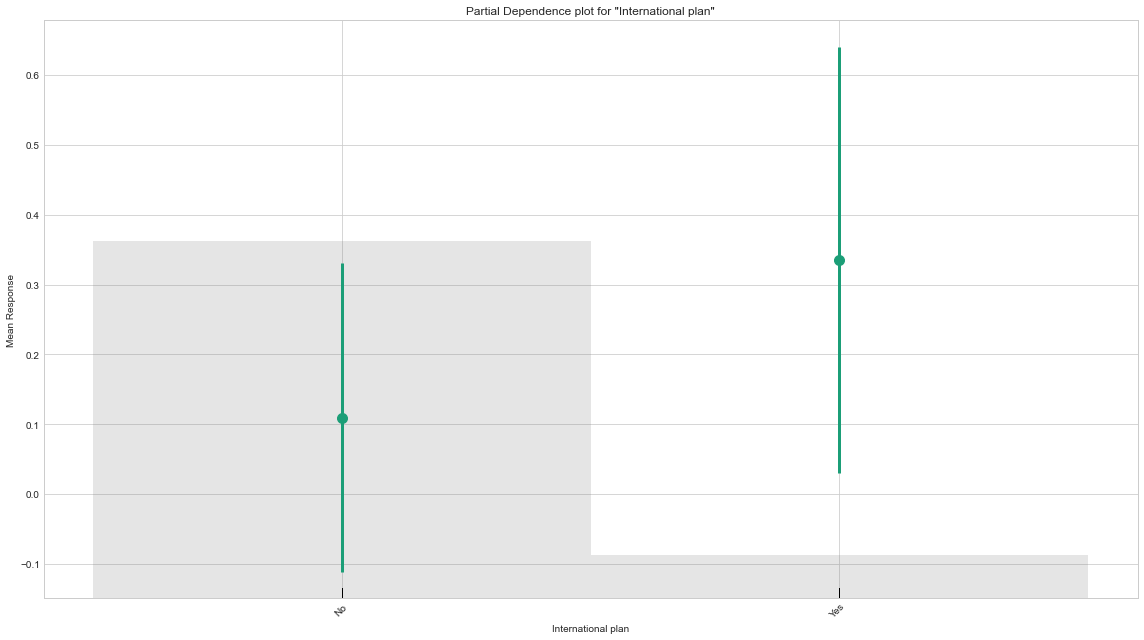

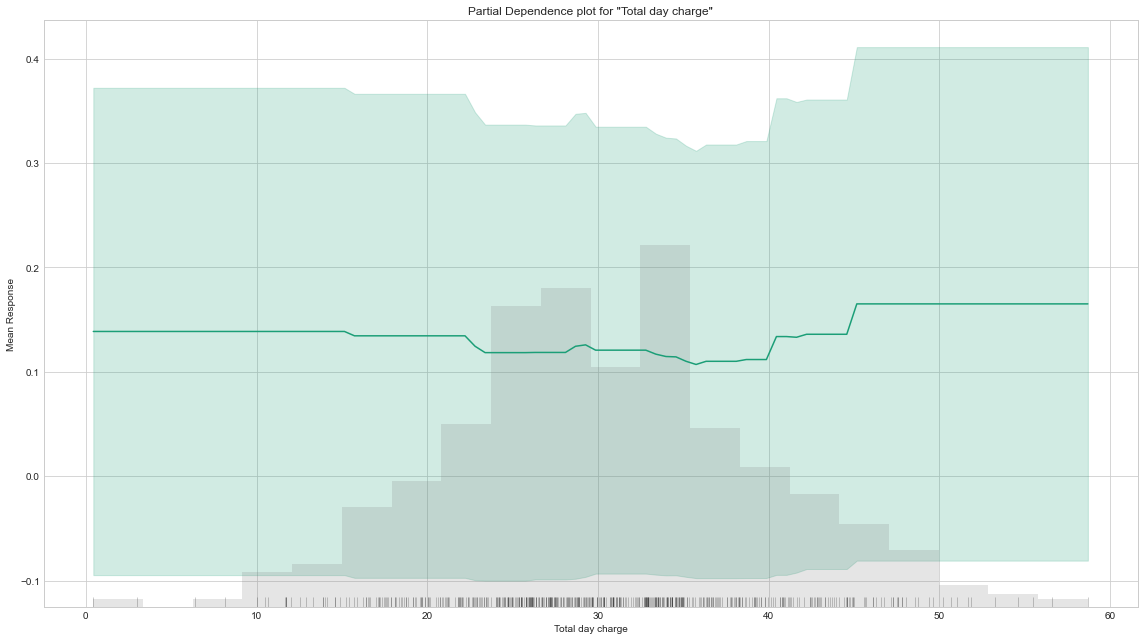

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_1_AutoML_1_20221207_82237

,False,True,Error,Rate
False,448.0,11.0,0.024,(11.0/459.0)
True,17.0,61.0,0.2179,(17.0/78.0)
Total,465.0,72.0,0.0521,(28.0/537.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [98]:
aml.leader.explain(df_test)